<a href="https://colab.research.google.com/github/rahulpatwal07/Basic-tensorflow-projects/blob/main/CIFER10_using_RESNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

## Loading the data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 9s 0us/step


In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
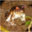

In [4]:
x_train[0]

In [5]:
y_train[0]

array([6], dtype=uint8)

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Viewing random images

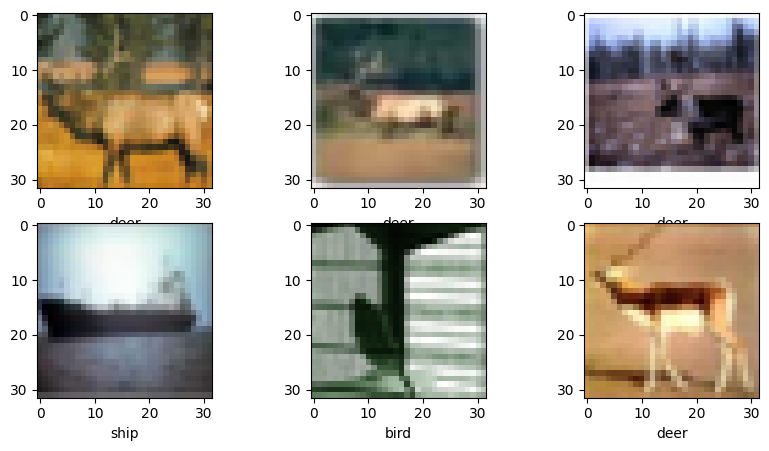

In [7]:
import random
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    random_index = random.randint(0, len(x_train))
    plt.grid(False)
    plt.imshow(x_train[random_index])
    plt.xlabel(class_names[y_train[random_index][0]])

In [8]:
x_train.min(), x_train.max()

(0, 255)

In [9]:
# Normalize the images to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
x_train[0].shape

(32, 32, 3)

In [11]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['acc']
  val_accuracy = history.history['val_acc']

  epochs = (range(len(history.history['loss'])))

  plt.plot(epochs, loss, label='Training_loss')
  plt.plot(epochs, val_loss, label='Val_loss')
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='Training_accuracy')
  plt.plot(epochs, val_accuracy, label="Val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

## Model 1 - Base Model

In [12]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
history_1 = model_1.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 8s 4ms/step - loss: 2.3044 - acc: 0.0970 - val_loss: 2.3026 - val_acc: 0.0958
Epoch 2/10
1407/1407 [==============================] - 4s 3ms/step - loss: 2.3027 - acc: 0.0978 - val_loss: 2.3027 - val_acc: 0.0976
Epoch 3/10
1407/1407 [==============================] - 4s 3ms/step - loss: 2.3027 - acc: 0.0988 - val_loss: 2.3008 - val_acc: 0.0976
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 2.2814 - acc: 0.1191 - val_loss: 2.1877 - val_acc: 0.1536
Epoch 5/10
1407/1407 [==============================] - 4s 3ms/step - loss: 2.1202 - acc: 0.1705 - val_loss: 2.0932 - val_acc: 0.1638
Epoch 6/10
1407/1407 [==============================] - 5s 3ms/step - loss: 2.0723 - acc: 0.1776 - val_loss: 2.0602 - val_acc: 0.1850
Epoch 7/10
1407/1407 [==============================] - 5s 3ms/step - loss: 2.0525 - acc: 0.1846 - val_loss: 2.0683 - val_acc: 0.1770
Epoch 8/10
1407/1407 [==============================] - 4s 3ms

In [13]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.0322 - acc: 0.1880


[2.0322494506835938, 0.18799999356269836]

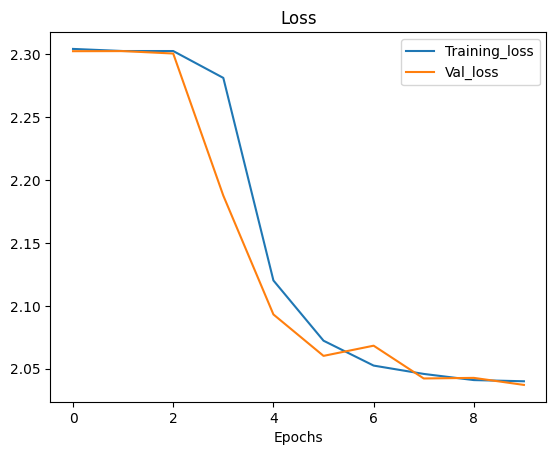

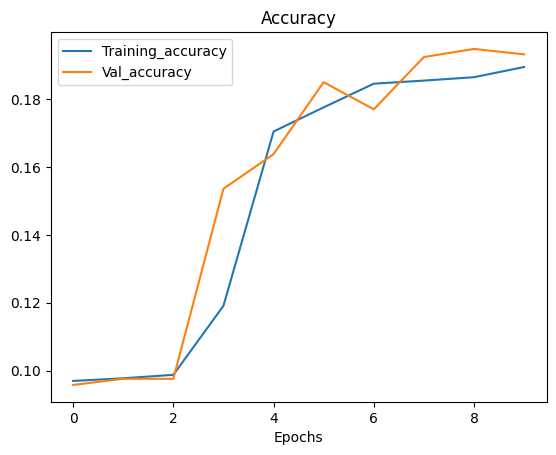

In [14]:
plot_loss_curves(history_1)

## Model 2 - Conv2D

In [15]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
model_2.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 13s 5ms/step - loss: 1.7233 - accuracy: 0.3650 - val_loss: 1.4337 - val_accuracy: 0.4780
Epoch 2/10
1407/1407 [==============================] - 8s 5ms/step - loss: 1.4113 - accuracy: 0.4910 - val_loss: 1.2734 - val_accuracy: 0.5320
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2846 - accuracy: 0.5431 - val_loss: 1.1956 - val_accuracy: 0.5786
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1860 - accuracy: 0.5814 - val_loss: 1.1420 - val_accuracy: 0.5946
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1202 - accuracy: 0.6049 - val_loss: 1.0582 - val_accuracy: 0.6314
Epoch 6/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.0669 - accuracy: 0.6254 - val_loss: 1.0163 - val_accuracy: 0.6352
Epoch 7/10
1407/1407 [==============================] - 6s 5ms/step - loss: 1.0117 - accuracy: 0.6437 - val_loss: 1.0168 - val_accuracy

In [17]:
model_2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0221 - accuracy: 0.6516


[1.022113561630249, 0.6516000032424927]

In [18]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = (range(len(history.history['loss'])))

  plt.plot(epochs, loss, label='Training_loss')
  plt.plot(epochs, val_loss, label='Val_loss')
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='Training_accuracy')
  plt.plot(epochs, val_accuracy, label="Val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

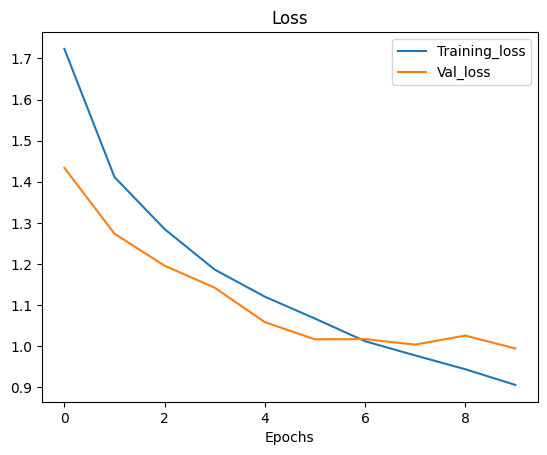

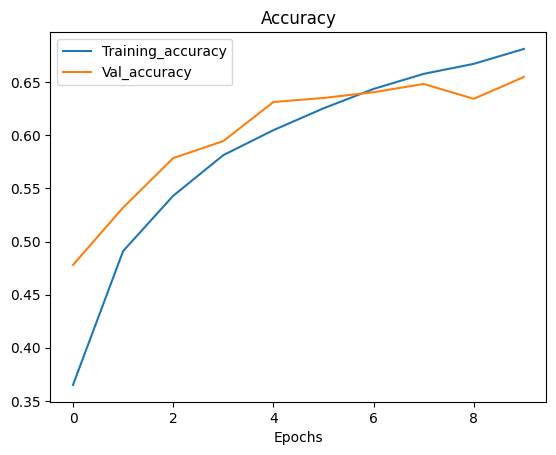

In [19]:
plot_loss_curves(history_2)

## Model 3 - Resnet model

In [24]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
resnet_model.trainable = False
inputs = layers.Input(shape=(32, 32, 3))
x = layers.experimental.preprocessing.Resizing(256, 256)(inputs)
x = resnet_model(x, training=False)
x = layers.Flatten()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_3 = models.Model(inputs, outputs)
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resizing_1 (Resizing)       (None, 256, 256, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 131072)            0         
                                                                 
 batch_normalization_7 (Bat  (None, 131072)            524288    
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 128)               16777344  
                                                           

In [25]:
model_3.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
                metrics=['accuracy'])

In [30]:
history_3 = model_3.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 186s 132ms/step - loss: 1.3820 - accuracy: 0.5242 - val_loss: 1.1662 - val_accuracy: 0.5974
Epoch 2/10
1407/1407 [==============================] - 188s 134ms/step - loss: 1.3657 - accuracy: 0.5274 - val_loss: 1.1485 - val_accuracy: 0.6076
Epoch 3/10
1407/1407 [==============================] - 186s 132ms/step - loss: 1.3481 - accuracy: 0.5346 - val_loss: 1.1411 - val_accuracy: 0.6056
Epoch 4/10
1407/1407 [==============================] - 190s 135ms/step - loss: 1.3243 - accuracy: 0.5445 - val_loss: 1.1205 - val_accuracy: 0.6076
Epoch 5/10
1407/1407 [==============================] - 190s 135ms/step - loss: 1.3135 - accuracy: 0.5484 - val_loss: 1.1136 - val_accuracy: 0.6082
Epoch 6/10
1407/1407 [==============================] - 189s 134ms/step - loss: 1.2986 - accuracy: 0.5526 - val_loss: 1.1097 - val_accuracy: 0.6162
Epoch 7/10
1407/1407 [==============================] - 188s 134ms/step - loss: 1.2843 - accuracy: 0.5596 - val_

**Note** - Increase the epoch to 25 to improve accuracy

In [36]:
model_3.evaluate(x_test, y_test)

313/313 [==============================] - 37s 119ms/step - loss: 1.0967 - accuracy: 0.6224


[1.0967191457748413, 0.6223999857902527]

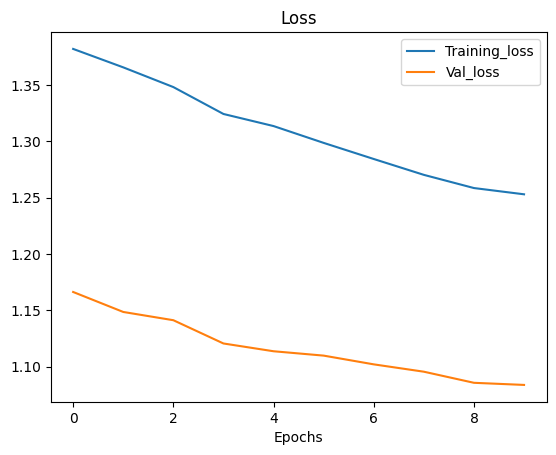

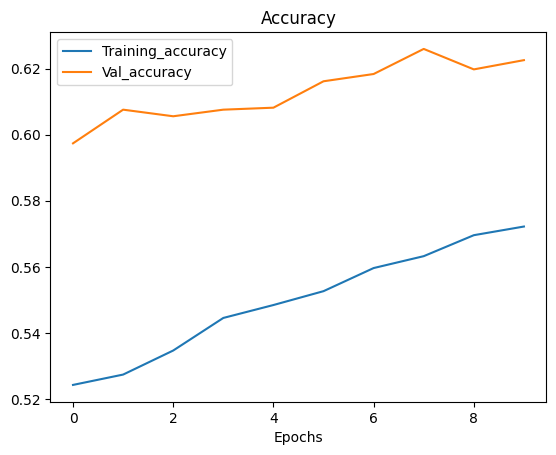

In [37]:
plot_loss_curves(history_3)